# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.io.stata.read_stata('/Users/Thinslicer/Desktop/Data Scientist Career/Springboard/Inferential Statistics/racial_disc/data/us_job_market_discrimination.dta')

<b> Initial EDA

In [39]:
data.shape

(4870, 65)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [11]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
education,4870.0,3.618480,0.714997,0.000000,3.000000,4.000000,4.000000,4.000000
ofjobs,4870.0,3.661396,1.219126,1.000000,3.000000,4.000000,4.000000,7.000000
yearsexp,4870.0,7.842916,5.044612,1.000000,5.000000,6.000000,9.000000,44.000000
honors,4870.0,0.052772,0.223601,0.000000,0.000000,0.000000,0.000000,1.000000
volunteer,4870.0,0.411499,0.492156,0.000000,0.000000,0.000000,1.000000,1.000000
military,4870.0,0.097125,0.296159,0.000000,0.000000,0.000000,0.000000,1.000000
empholes,4870.0,0.448049,0.497345,0.000000,0.000000,0.000000,1.000000,1.000000
occupspecific,4870.0,215.637782,148.127551,7.000000,27.000000,267.000000,313.000000,903.000000
occupbroad,4870.0,3.481520,2.038036,1.000000,1.000000,4.000000,6.000000,6.000000
workinschool,4870.0,0.559548,0.496492,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
data.head(10)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
7,b,1,3,4,21,0,1,0,1,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
8,b,1,4,3,3,0,0,0,0,316,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
9,b,1,4,2,6,0,1,0,0,263,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [13]:
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,b,b,b,b,b,b,b,b,b,b
ad,1,1,1,1,1,1,1,1,1,1
education,4,3,4,3,3,4,4,3,4,4
ofjobs,2,3,1,4,3,2,2,4,3,2
yearsexp,6,6,6,6,22,6,5,21,3,6
honors,0,0,0,0,0,1,0,0,0,0
volunteer,0,1,0,1,0,0,1,1,0,1
military,0,1,0,0,0,0,0,0,0,0
empholes,1,0,0,1,0,0,0,1,0,0
occupspecific,17,316,19,313,313,266,13,313,316,263


In [18]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [19]:
# number of non-callbacks for black-sounding names
sum(data[data.race=='b'].call==0)

2278

In [16]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [20]:
# number of non-callbacks for white-sounding names
sum(data[data.race=='w'].call==0)

2200

In [23]:
# total callbacks
sum(data.call)

392.0

Fraction of black-sounding names 'b' callbacks of all resumes = 157/(157+2278) = 0.0645 or 6.45%
Fraction of white-sounding names 'w' callbacks of all resumes = 235/(235+2200) = 0.0965 or 9.65% 

Fraction of 'b' callbacks = 157/392 = 0.40051 or 40.051%
Fraction of 'w' callbacks = 235/392 = 0.59949 or 59.949%  

In [37]:
# Separate dataframe into the relevant variables to answer our question of whether 
# race has a significant impact on the rate of callbacks for resumes
df = data[['race', 'call']]
df.head(10)

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0
5,w,0.0
6,w,0.0
7,b,0.0
8,b,0.0
9,b,0.0


In [38]:
# Separate the data into 'b' and 'w'
b = df[df.race == 'b']
w = df[df.race == 'w']

# Check to make sure the data is equivalent in length 
len(b), len(w)

(2435, 2435)

# Question 1: What test is appropriate for this problem? Does CLT apply?

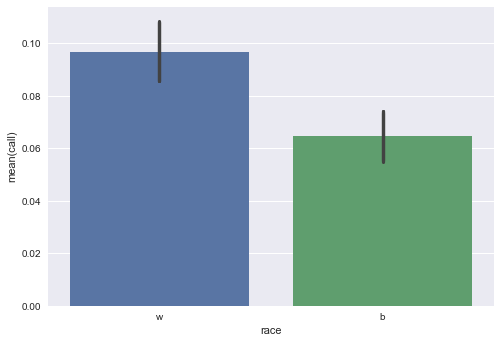

In [44]:
# Graphical EDA of rate of call backs 
sns.barplot(data=df, x='race', y='call')
plt.show()

We see a clear difference in the rate of call back from the graph between 'w' vs 'b' callbacks 

We can use a z-test to verify the statistical signficance of this difference since our sample size n > 30. The Central Limit Theorem does apply here with these categorical data since it states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. 

# Question 2: What are the null and alternate hypotheses?

The null hypothesis illustrates that the callback rate for black and white sounding names are equal, Ho: r_b = r_w 

The alternate hypothesis shows that there is a significant difference in the callback rates Ha: r_b != r_w 

# Question 3: Compute margin of error, confidence interval, and p-value.

In [80]:
# We calculate the exact rate from the bar plot above 

r_b = ((sum(b.call)) / (len(b.call)))
r_w = ((sum(w.call)) / (len(w.call)))

print('Callback rate for black-sounding names r_b = ', r_b)
print('Callback rate for white-sounding names r_w = ', r_w)
print("The point estimate, r_w - r_b, is ", r_w - r_b)

Callback rate for black-sounding names r_b =  0.064476386037
Callback rate for white-sounding names r_w =  0.0965092402464
The point estimate, r_w - r_b, is  0.0320328542094


In [73]:
# Find the standard error for each rate or proportion 
se = np.sqrt((r_b * (1- r_b) / (len(b))) + (r_w * (1 - r_w) / (len(w))))
se

0.0077833705866767544

In [78]:
# We are calculating at the 5% significance level so our critical value is 1.96 
crit = 1.96
moe = abs(crit * se)

print("The margin of error is", moe)
print("The true population proportion lies +/- %0.6F around the point estimate" %moe)
print("The 95% confidence interval is given by :", r_w - r_b + moe, r_w - r_b - moe)

The margin of error is 0.0152554063499
The true population proportion lies +/- 0.015255 around the point estimate
The 95% confidence interval is given by : 0.0472882605593 0.0167774478596


In [81]:
# To calculate the p-value we can use z-test function from statsmodels 
from statsmodels.stats.weightstats import ztest
ztest = ztest(data.call[data.race == 'w'],data.call[data.race == 'b'], alternative = 'two-sided')
print("Z-score is equal to : %6.3F  p-value equal to: %6.7F" % (abs(ztest[0]),ztest[1]))

Z-score is equal to :  4.115  p-value equal to: 0.0000388


We see that the p-value is less than 0.05 so we can conclude that the two rates are not equal and reject the null hypothesis. 

# Question 4+5: Statistical significance and analysis amendments

From our analysis above, we see that the difference in the black-sounding names and white-sounding names callbacks is significant. This leads us to conclude that race does have a signficant impact on the rate of callbacks for all resumes. However, this conclusion is based on the premise that all resumes were identical across all categorical columns except for race, so we cannot assume that race/name is the most important factor for callback success. To analyze this, we would need to incorporate all the relevant columns and normalize them in a way that we can be sure their variables are held constant. 